# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from scipy import stats     
import time
import statsmodels.api as sm
import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

# Checking how does the data looks like

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Checking how big data set is

In [5]:
df.shape

(7752, 25)

- Our data has 7752 rows and 25 columns

# Checking the information and data types of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Date is of Object type else all variables are of float

# Checking for Duplicate values

In [7]:
df.duplicated().sum()

0

- Data has no duplicated values

# Checking for missing values

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

columns has missing values so we have to handel them

# Checking how does the data looks mathematically

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000



Using the describe method to check the numerical data details. Almost all the columns in our dataset has numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points. However, I do see some abnormality that we will have to confirm with a visual on it.

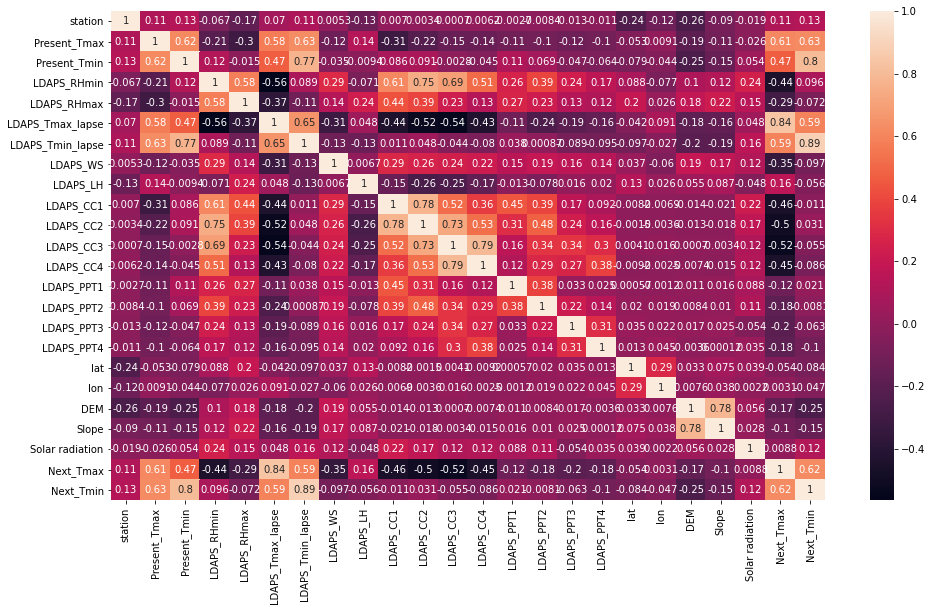

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations

- Next_Tmin & LDAPSA_Tmin_lapse are 89 % correlated , DEM and slpoe are 78 % positively correlated ,Present_Tmin is .61 & .63 Correlated with the target vairables

# Data pre processing

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0



Here we have removed the object datatype "Date" column and separated the "Date" column into three different columns namely day - month - year with the help of pandas Datetime option

In [12]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


# Checking for unique values

In [13]:
df.nunique().to_frame("Unique Values")


,Unique Values
station,25
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675
LDAPS_CC1,7569


In [14]:
df.isnull().mean()*100

station             0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
Day                 0.025800
Month               0.025800
Year                0.025800
dtype: float64

since we have missing values less than 1 %  so we are going to drop them

In [15]:
df.dropna(inplace=True)
df.shape

(7588, 27)

Now we have 7588 rows and 27 columns

In [16]:
df.isnull().sum()


station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

No missing vakues present in data

In [17]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


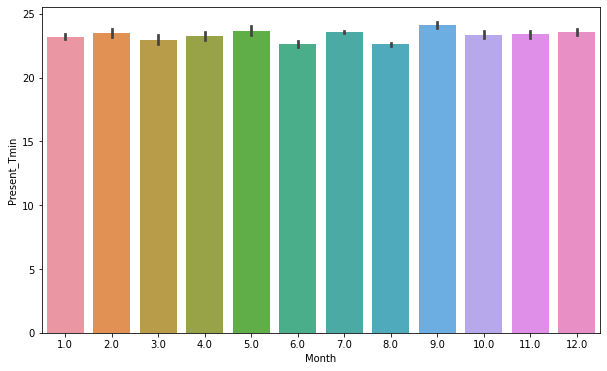

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(df["Month"],df["Present_Tmin"])
plt.show()

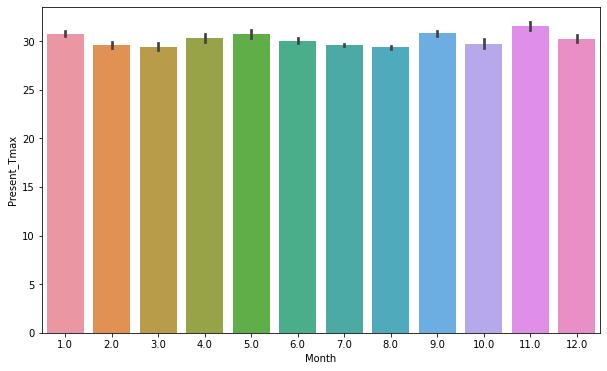

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(df["Month"],df["Present_Tmax"])
plt.show()

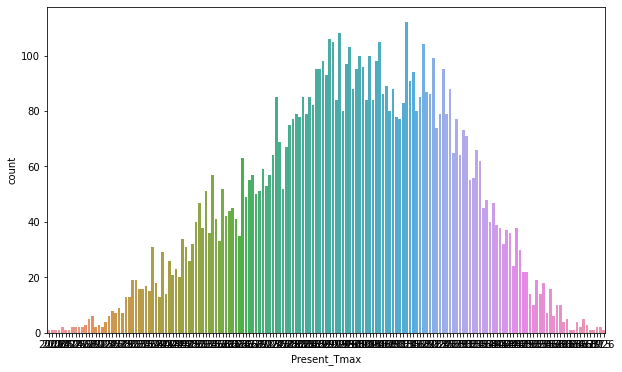

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df["Present_Tmax"])
plt.show()

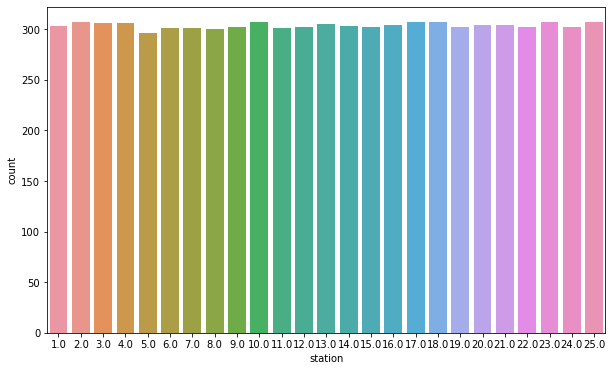

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df["station"])
plt.show()

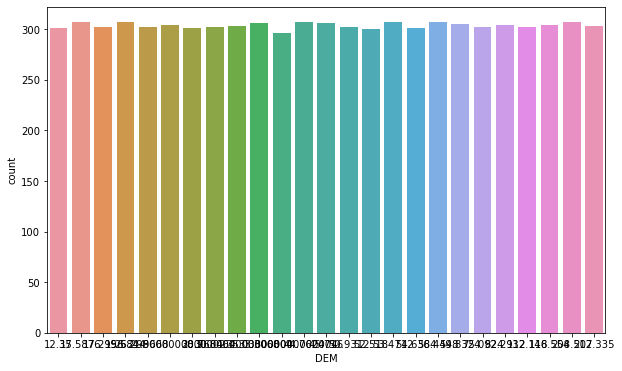

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(df["DEM"])
plt.show()

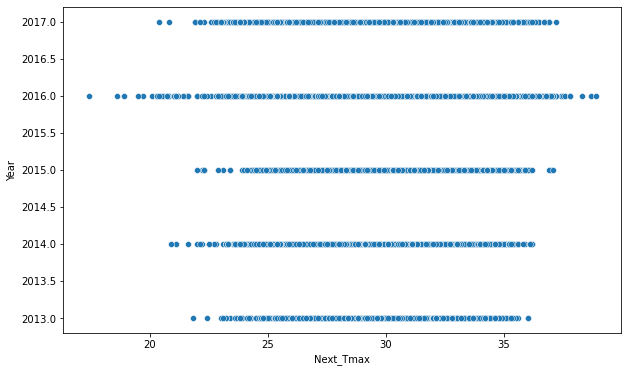

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Next_Tmax"],df["Year"])
plt.show()

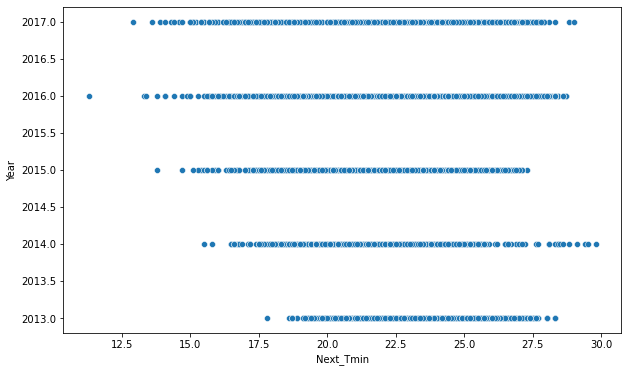

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Next_Tmin"],df["Year"])
plt.show()

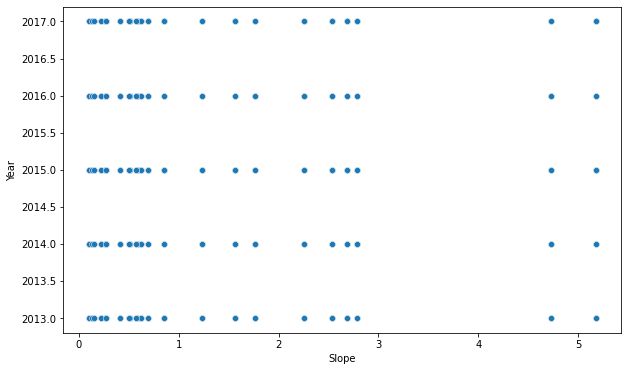

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Slope"],df["Year"])
plt.show()

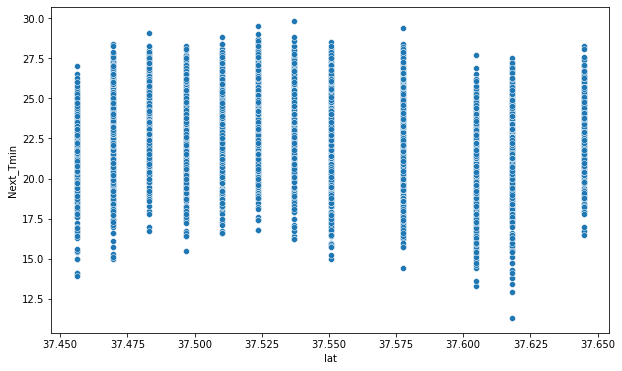

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["lat"],df["Next_Tmin"])
plt.show()

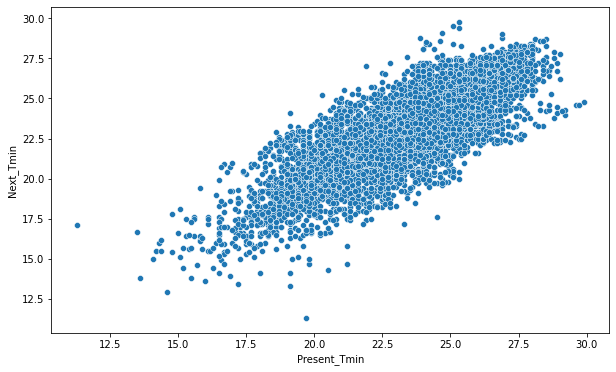

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Present_Tmin"],df["Next_Tmin"])
plt.show()

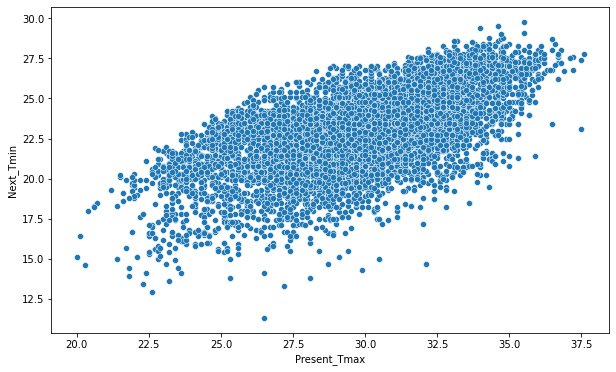

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Present_Tmax"],df["Next_Tmin"])
plt.show()

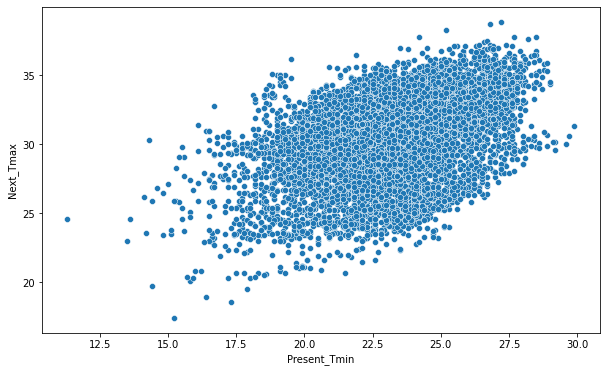

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Present_Tmin"],df["Next_Tmax"])
plt.show()

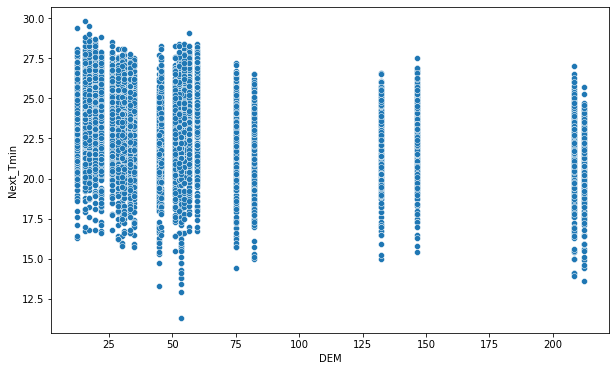

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["DEM"],df["Next_Tmin"])
plt.show()

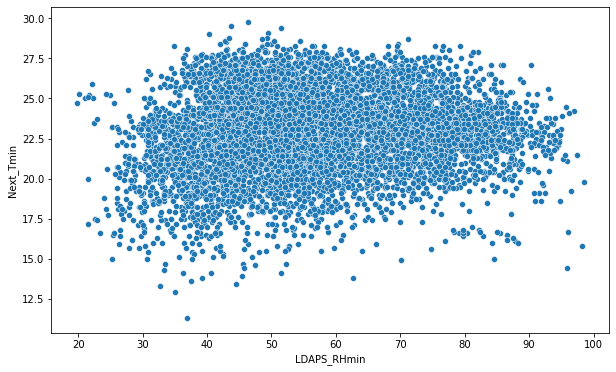

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["LDAPS_RHmin"],df["Next_Tmin"])
plt.show()

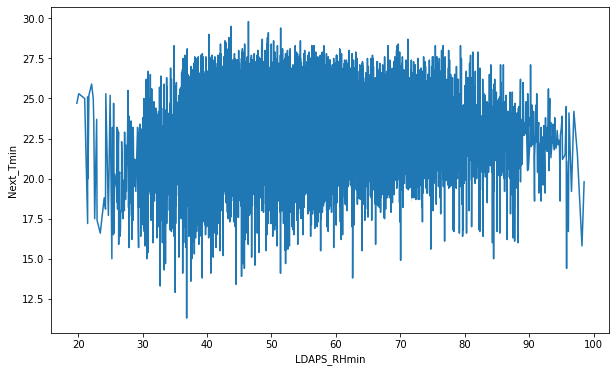

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(df["LDAPS_RHmin"],df["Next_Tmin"])
plt.show()

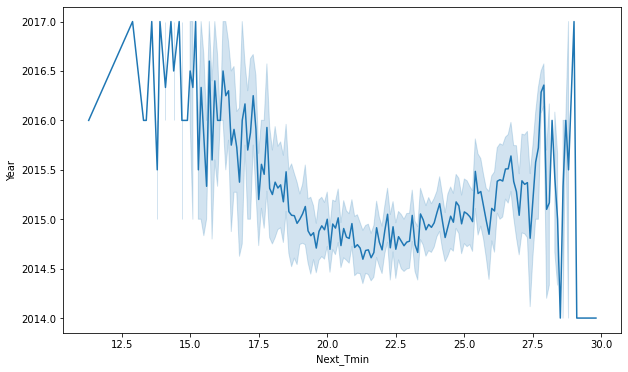

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(df["Next_Tmin"],df["Year"])
plt.show()

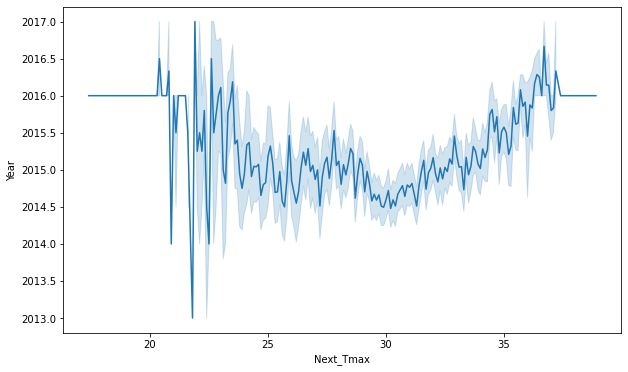

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(df["Next_Tmax"],df["Year"])
plt.show()

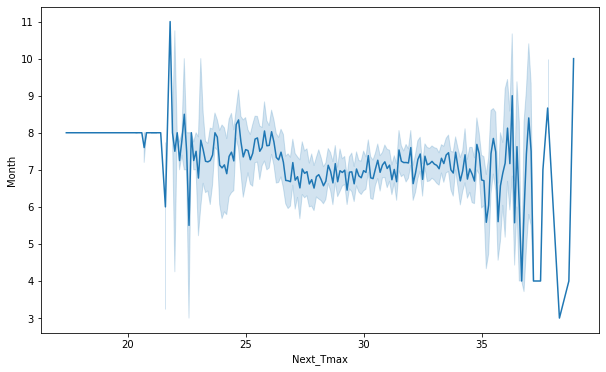

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(df["Next_Tmax"],df["Month"])
plt.show()

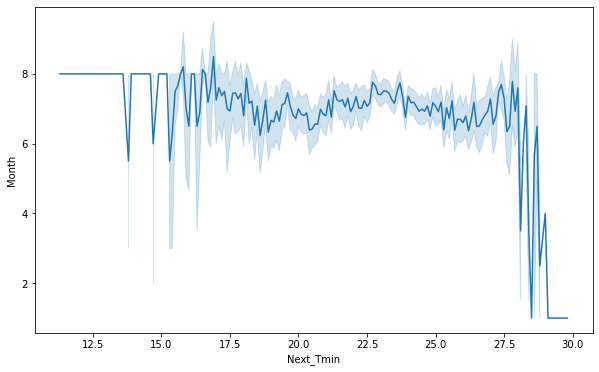

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(df["Next_Tmin"],df["Month"])
plt.show()

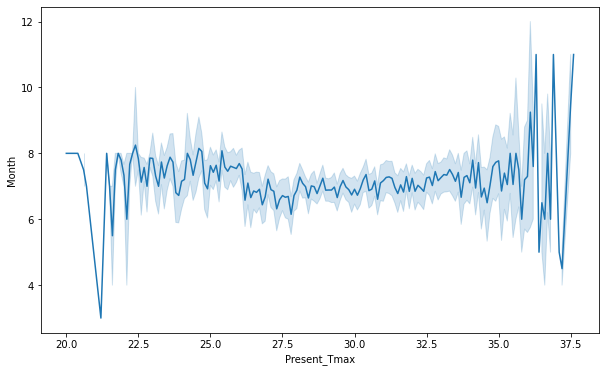

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(df["Present_Tmax"],df["Month"])
plt.show()

# Checking for outliers

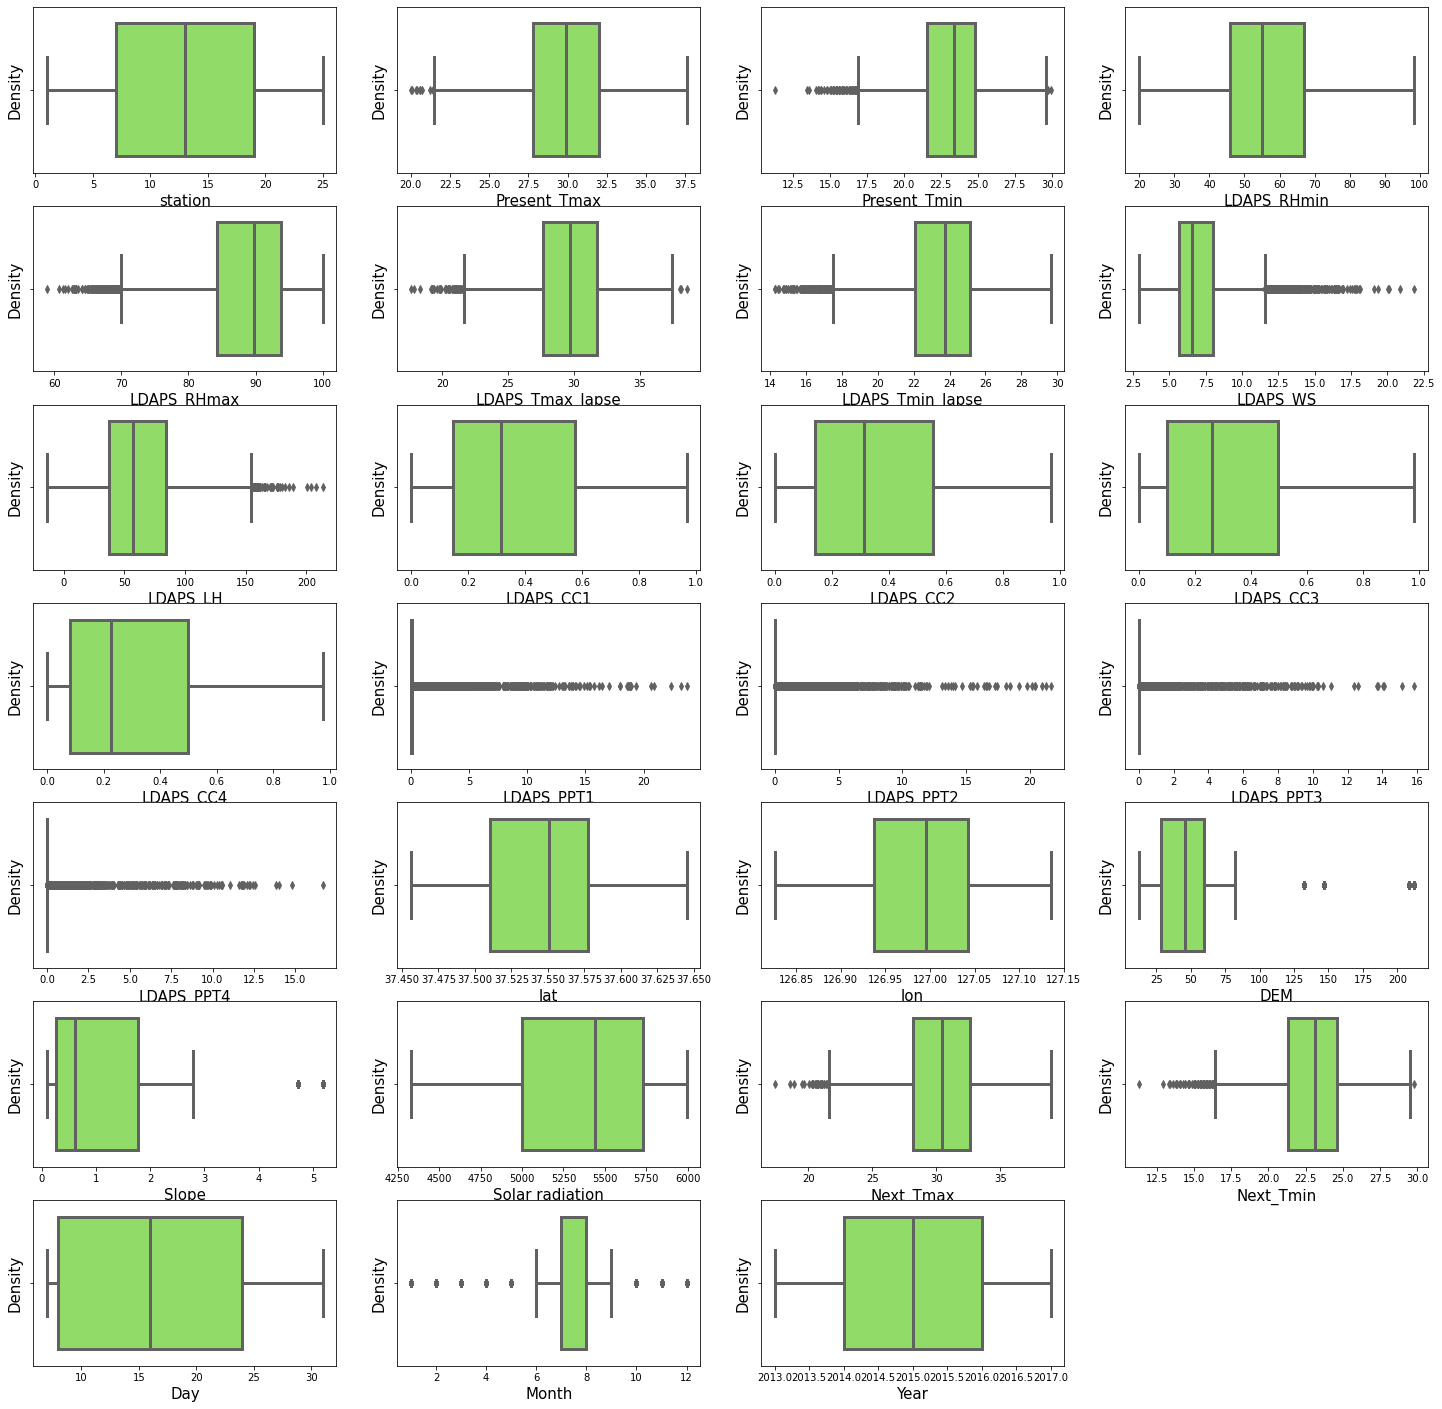

In [38]:
plt.figure(figsize=(25,25))
for i ,j in enumerate(df.columns):
    plt.subplot(7,4,i+1)
    sns.boxplot(df[j],color='#8BEE56',width=0.8,linewidth=3)
    plt.xlabel(j,fontsize=15,color='k',)
    plt.ylabel('Density',fontsize=15,color='k')
plt.show() 

Some columns has outliers so we have to remove them

In [39]:
# columns having outliers
for i in df.columns:
    IQR = df[i].quantile(.75) - df[i].quantile(.25)
    upper =  df[i].quantile(.75) + 1.5 * IQR
    lower =  df[i].quantile(.75) - 1.5 * IQR
    df[i] = np.where(df[i]> upper ,upper , np.where(df[i]<lower , lower ,df[i]))

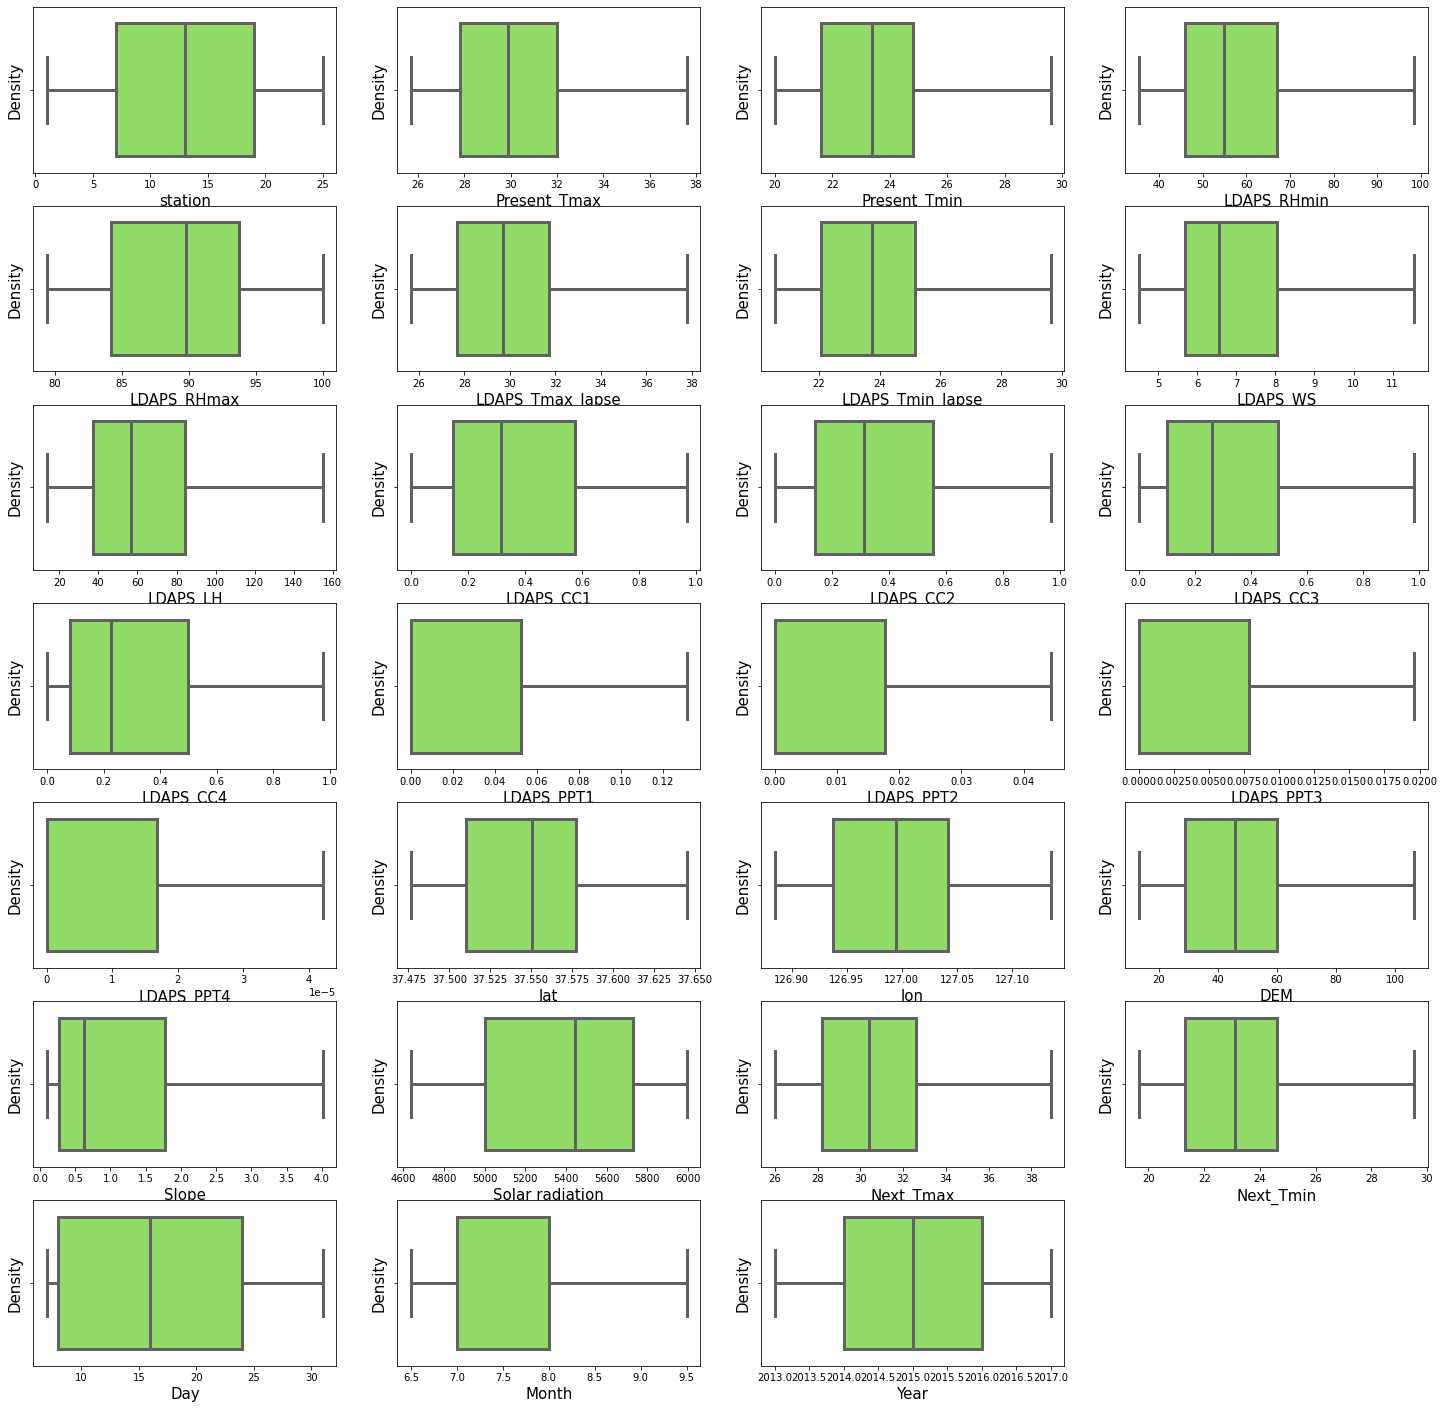

In [40]:
plt.figure(figsize=(25,25))
for i ,j in enumerate(df.columns):
    plt.subplot(7,4,i+1)
    sns.boxplot(df[j],color='#8BEE56',width=0.8,linewidth=3)
    plt.xlabel(j,fontsize=15,color='k',)
    plt.ylabel('Density',fontsize=15,color='k')
plt.show()

We removed outliers successfully

# Checking for distribution

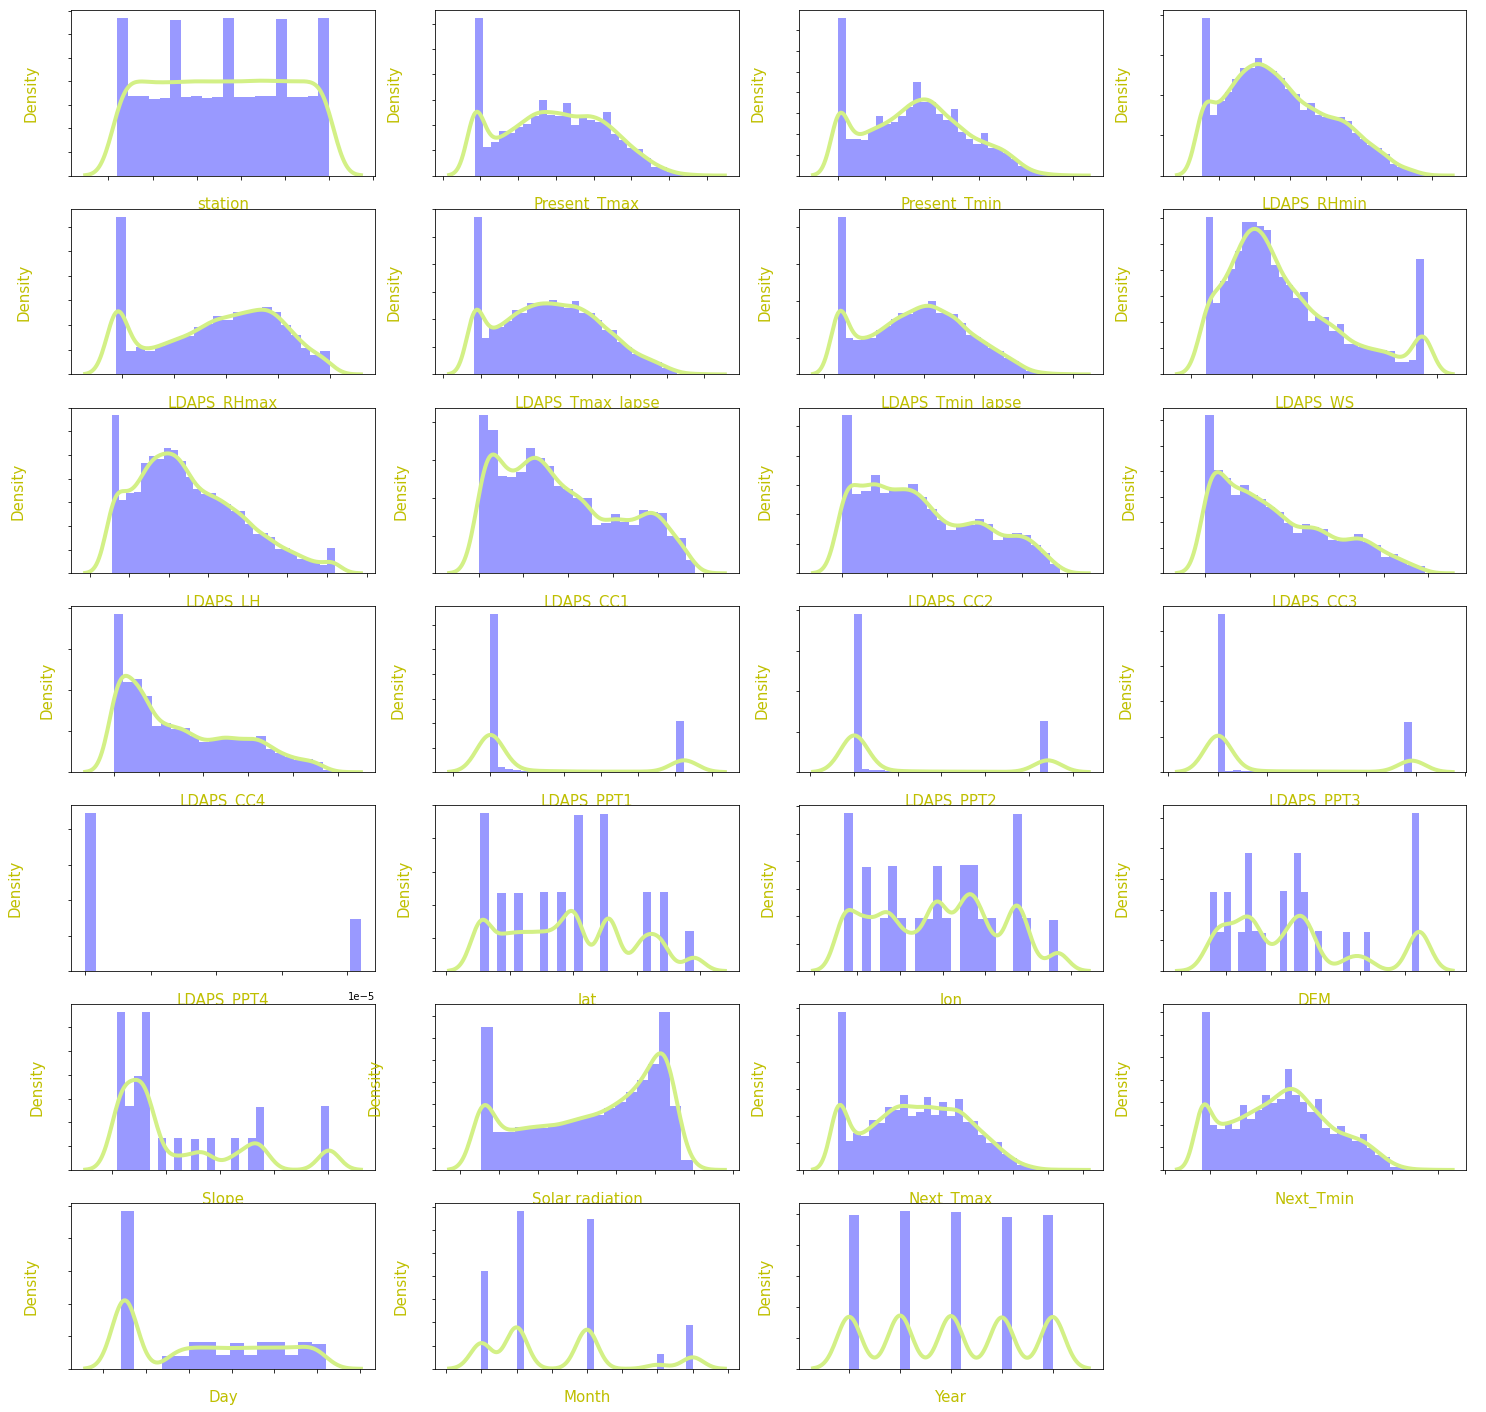

In [41]:
plt.figure(figsize=(25,25))
plt.grid(b=2,axis='y')
for i ,j in enumerate(df.columns):
    plt.subplot(7,4,i+1)
    sns.distplot(df[j],color='b',kde_kws={'color': '#D3F086','linewidth':4})
    plt.xlabel(j,fontsize=15,color='y',)
    plt.ylabel('Density',fontsize=15,color='y')
    plt.xticks(color='w',fontsize=10)
    plt.yticks(color='w',fontsize=10)
plt.show() 

# Checking for skewness

In [42]:
df.skew()

station            -0.004178
Present_Tmax        0.082748
Present_Tmin        0.154737
LDAPS_RHmin         0.425437
LDAPS_RHmax        -0.227063
LDAPS_Tmax_lapse    0.206683
LDAPS_Tmin_lapse    0.081734
LDAPS_WS            0.894684
LDAPS_LH            0.618364
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.168398
LDAPS_PPT2          1.168897
LDAPS_PPT3          1.178753
LDAPS_PPT4          1.155677
lat                 0.221684
lon                 0.049248
DEM                 0.733254
Slope               1.177536
Solar radiation    -0.420172
Next_Tmax           0.048955
Next_Tmin           0.152599
Day                 0.245563
Month               0.808668
Year                0.013575
dtype: float64

In [43]:
columns_with_skewness=[]
for i in df.columns:
    if df[i].skew() > 0.5:
        columns_with_skewness.append(i)

In [44]:
columns_with_skewness

['LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'DEM',
 'Slope',
 'Month']

In [45]:
# performing Boxcox transformation on right skewed columns
for i,j in enumerate(columns_with_skewness):
    df[j],params = stats.boxcox(df[j]+0.01)

In [46]:
df.skew()

station            -0.004178
Present_Tmax        0.082748
Present_Tmin        0.154737
LDAPS_RHmin         0.425437
LDAPS_RHmax        -0.227063
LDAPS_Tmax_lapse    0.206683
LDAPS_Tmin_lapse    0.081734
LDAPS_WS            0.048497
LDAPS_LH           -0.056174
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3          -0.154717
LDAPS_CC4          -0.155065
LDAPS_PPT1          0.818261
LDAPS_PPT2          0.930705
LDAPS_PPT3          0.980018
LDAPS_PPT4               NaN
lat                 0.221684
lon                 0.049248
DEM                -0.021927
Slope               0.001900
Solar radiation    -0.420172
Next_Tmax           0.048955
Next_Tmin           0.152599
Day                 0.245563
Month               0.136350
Year                0.013575
dtype: float64

In [47]:
df.drop("LDAPS_PPT4",inplace=True,axis=1)

In [48]:
columns_with_skewness=[]
for i in df.columns:
    if df[i].skew() > 0.5:
        columns_with_skewness.append(i)
else:
    print('No Skewness')      

No Skewness


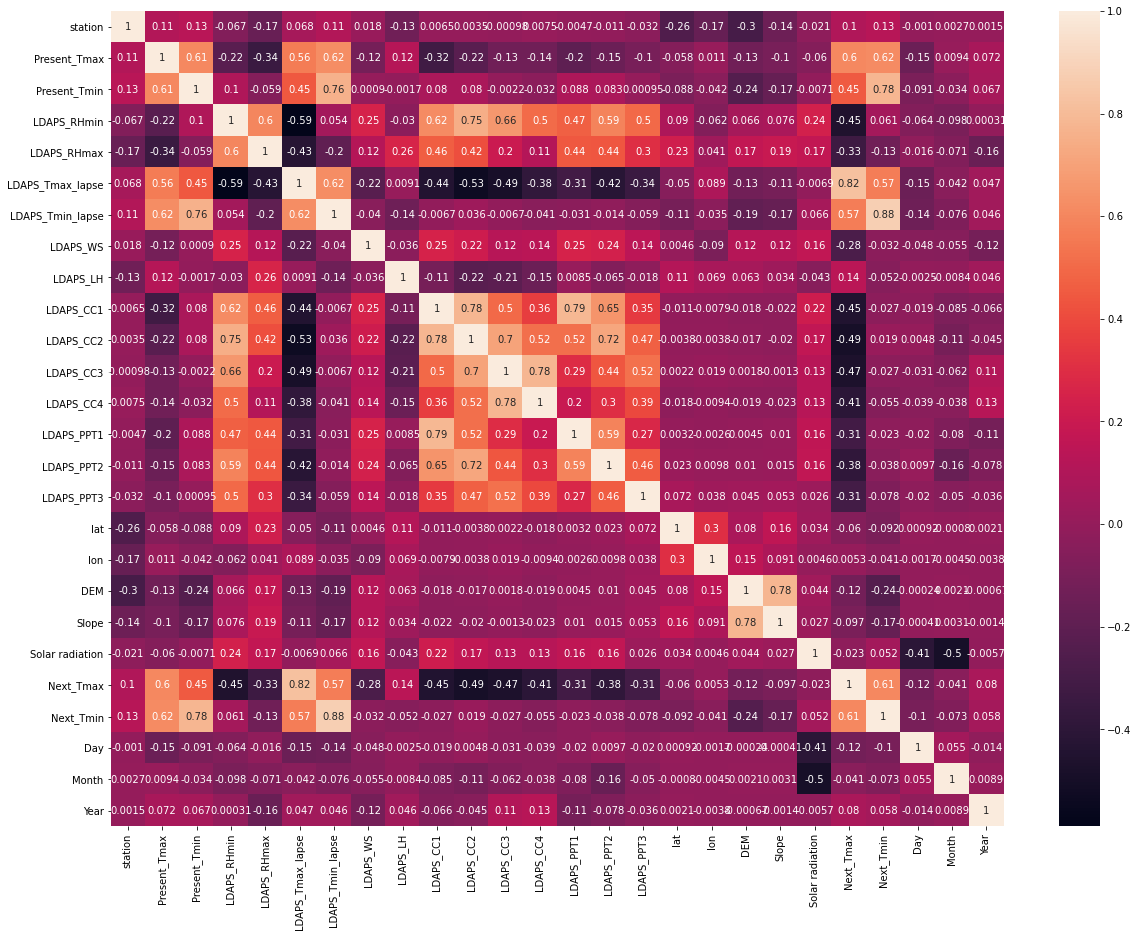

In [49]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

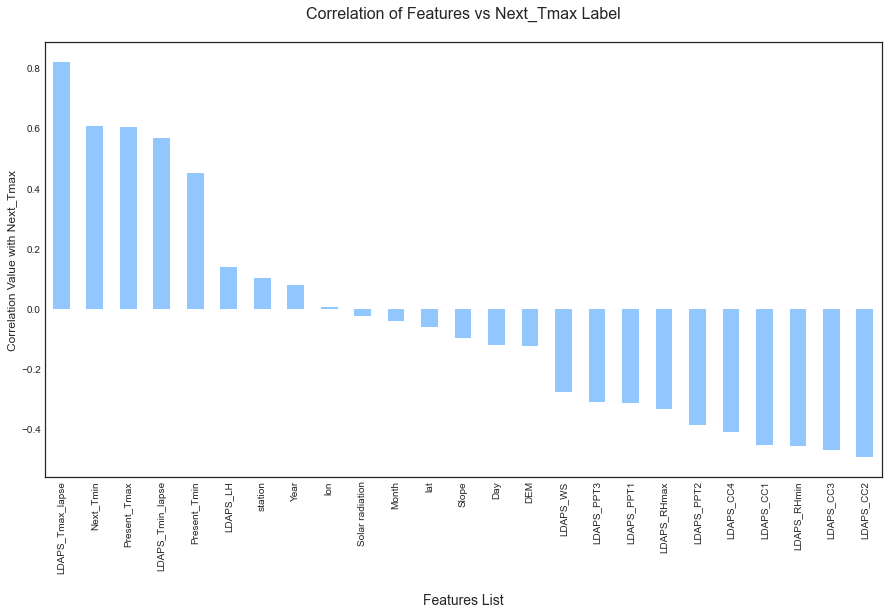

In [50]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr["Next_Tmax"].sort_values(ascending=False).drop("Next_Tmax").plot.bar()
plt.title("Correlation of Features vs Next_Tmax Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value with Next_Tmax", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that less than half the columns in our dataset are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our regression temperature label "Next_Tmax

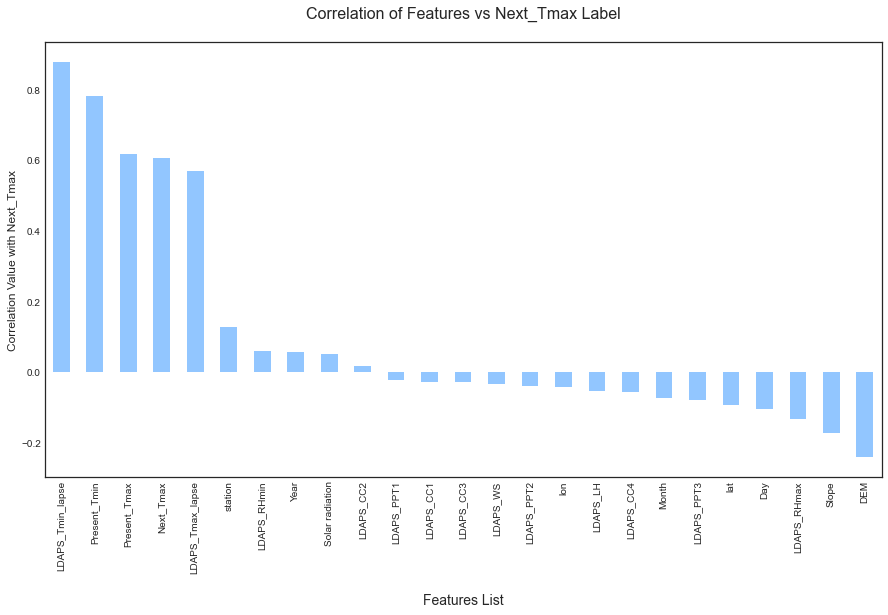

In [51]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr["Next_Tmin"].sort_values(ascending=False).drop("Next_Tmin").plot.bar()
plt.title("Correlation of Features vs Next_Tmax Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value with Next_Tmax", fontsize=12)
plt.show()


Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the columns in our dataset are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our regression temperature label "Next_Tmin"

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.ensemble import BaggingRegressor

In [53]:
X = df.drop(columns=["Next_Tmax","Next_Tmin"],axis=1)
y = df[["Next_Tmax","Next_Tmin"]]

In [54]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.001062,10.977156,0.233947,0.203896,-1.259016,-1.428946,-126.08046,-2717.950978,-362279.810829,37.6046,126.991,6.111804,1.025241,5992.895996,30.0,0.333709,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,0.957183,9.513288,0.225508,0.251771,-1.265462,-1.440673,-126.08046,-2717.950978,-362279.810829,37.6046,127.032,4.726111,-0.647099,5869.312500,30.0,0.333709,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,0.976264,5.825927,0.209344,0.257469,-1.146046,-1.389255,-126.08046,-2717.950978,-362279.810829,37.5776,127.058,4.283315,-1.291070,5863.555664,30.0,0.333709,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,0.955258,10.686425,0.216372,0.226002,-1.260555,-1.416965,-126.08046,-2717.950978,-362279.810829,37.6450,127.022,4.758244,0.931912,5856.964844,30.0,0.333709,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,0.959141,13.546817,0.151407,0.249995,-1.211391,-1.298107,-126.08046,-2717.950978,-362279.810829,37.5507,127.135,4.358190,-0.663698,5859.552246,30.0,0.333709,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,25.7,20.0,35.382815,79.434223,27.812697,20.552400,0.993697,4.585426,0.052902,0.030169,-2.084736,-2.241436,-126.08046,-2717.950978,-362279.810829,37.5507,127.040,3.939696,-0.541833,4637.485656,30.0,0.334285,2017.0
7746,22.0,25.7,20.0,35.382815,83.690018,26.704905,20.552400,0.960625,11.902589,0.066461,0.024518,-2.084727,-2.068888,-126.08046,-2717.950978,-362279.810829,37.5102,127.086,3.683948,-1.952822,4637.485656,30.0,0.334285,2017.0
7747,23.0,25.7,20.0,35.382815,79.434223,26.352081,20.552400,0.976691,11.175036,0.030034,0.081035,-2.084736,-2.321781,-126.08046,-2717.950978,-362279.810829,37.5372,126.891,3.210355,-1.807366,4637.485656,30.0,0.334285,2017.0
7748,24.0,25.7,20.0,35.382815,79.434223,27.010193,20.552400,0.991555,9.071078,0.035874,0.074962,-2.084736,-2.321781,-126.08046,-2717.950978,-362279.810829,37.5237,126.909,3.351993,-1.464973,4637.485656,30.0,0.334285,2017.0


In [55]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.20
1,30.5,22.50
2,31.1,23.90
3,31.7,24.30
4,31.2,22.50
...,...,...
7745,27.6,19.65
7746,28.0,19.65
7747,28.3,19.65
7748,28.6,19.65


In [56]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() 

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,-1.664607,-0.438744,-0.899341,0.091391,0.358594,-0.631677,-0.331401,0.112478,0.363410,-0.513123,-0.587938,-0.418192,-0.430129,-0.703942,-0.659387,-0.640594,1.209666,-0.064042,1.536739,1.282308,1.550652,1.662861,-1.375852,-1.411767
1,-1.526052,0.742213,-0.805968,-0.329667,0.272422,0.033419,0.179789,-0.669048,-0.158694,-0.545304,-0.402304,-0.430169,-0.448829,-0.703942,-0.659387,-0.640594,1.209666,0.507655,0.046766,-0.279297,1.251243,1.662861,-1.375852,-1.411767
2,-1.387498,0.631498,-0.012293,-0.580725,-0.844414,0.123493,0.443632,-0.329197,-1.473830,-0.606944,-0.380211,-0.208286,-0.366833,-0.703942,-0.659387,-0.640594,0.650834,0.870195,-0.429351,-0.880626,1.237296,1.662861,-1.375852,-1.411767
3,-1.248943,0.779118,0.034394,0.090274,1.262575,-0.021261,-0.172665,-0.703332,0.259718,-0.580143,-0.502221,-0.421051,-0.411023,-0.703942,-0.659387,-0.640594,2.045843,0.368217,0.081318,1.195159,1.221328,1.662861,-1.375852,-1.411767
4,-1.110389,0.557688,-0.665908,-0.054875,0.196700,-0.242398,-0.092957,-0.634182,1.279906,-0.827872,-0.409191,-0.329702,-0.221480,-0.703942,-0.659387,-0.640594,0.094073,1.943870,-0.348842,-0.294796,1.227597,1.662861,-1.375852,-1.411767


# Finding the best random state for building Regression Models

In [57]:
def Best_model(pipe,X,y):
    Maximum_R2_score=0
    for random_state in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=random_state)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        R2_score=r2_score(y_test,y_pred)
        if R2_score>Maximum_R2_score:
            Maximum_R2_score=R2_score
            final_random_state=random_state
    print(f'At random state :-- {final_random_state}')
    print('Maximum r2 score is',  round(Maximum_R2_score ,4))
    print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
    print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='r2').std(),2))
    print('Training accuracy',round(pipe.score(X_train,y_train),2))
    print('Test Accuracy',round(pipe.score(X_test,y_test),2))
    print('MAE',round(mean_absolute_error(y_test,y_pred),2))
    print('MSE',round(mean_squared_error(y_test,y_pred),2))
    print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

### Linear Regression

In [58]:
pipe = LinearRegression()
Best_model(pipe,X,y)

At random state :-- 71
Maximum r2 score is 0.8028
cross validation score 0.7
Standard Deviation 0.07
Training accuracy 0.79
Test Accuracy 0.79
MAE 0.89
MSE 1.43
RMSE 1.2


### Ridge Regression

In [59]:
pipe = Ridge()
Best_model(pipe,X,y)

At random state :-- 71
Maximum r2 score is 0.8028
cross validation score 0.7
Standard Deviation 0.07
Training accuracy 0.79
Test Accuracy 0.79
MAE 0.89
MSE 1.43
RMSE 1.2


### Lasso

In [60]:
pipe = Lasso()
Best_model(pipe,X,y)

At random state :-- 48
Maximum r2 score is 0.5666
cross validation score 0.5
Standard Deviation 0.05
Training accuracy 0.55
Test Accuracy 0.56
MAE 1.42
MSE 2.96
RMSE 1.72


### ElasticNet Regression

In [61]:
pipe = ElasticNet()
Best_model(pipe,X,y)

At random state :-- 62
Maximum r2 score is 0.6431
cross validation score 0.56
Standard Deviation 0.04
Training accuracy 0.63
Test Accuracy 0.63
MAE 1.29
MSE 2.48
RMSE 1.57


### KNeighborsRegressor

In [62]:
pipe = KNeighborsRegressor()
Best_model(pipe,X,y)

At random state :-- 70
Maximum r2 score is 0.8808
cross validation score 0.53
Standard Deviation 0.11
Training accuracy 0.91
Test Accuracy 0.88
MAE 0.67
MSE 0.8
RMSE 0.9


### DecisionTreeRegressor

In [63]:
pipe = DecisionTreeRegressor()
Best_model(pipe,X,y)

At random state :-- 62
Maximum r2 score is 0.7961
cross validation score 0.42
Standard Deviation 0.13
Training accuracy 1.0
Test Accuracy 0.78
MAE 0.84
MSE 1.44
RMSE 1.2


# BaggingRegressor

In [64]:
pipe = BaggingRegressor(base_estimator=Ridge())
Best_model(pipe,X,y)

At random state :-- 71
Maximum r2 score is 0.803
cross validation score 0.7
Standard Deviation 0.07
Training accuracy 0.79
Test Accuracy 0.79
MAE 0.89
MSE 1.43
RMSE 1.2


Choosing Bagging Regresor as a best performing model

# hyper parameter tuning

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=60)
BR = BaggingRegressor(base_estimator=Ridge())
BR.fit(X_train,y_train)
y_pred = BR.predict(X_test)
y_train_pred = BR.predict(X_train)
print("Training r2 score  =",r2_score(y_train,y_train_pred))
print("testing r2 score =",r2_score(y_test,y_pred))
cross=(cross_val_score(BR , X,y,cv=10).mean())
print("cross Val Score is " ,cross )

Training r2 score  = 0.7842769558547186
testing r2 score = 0.8024816108710591
cross Val Score is  0.6795532388647839


In [66]:
params = {
    
    "n_estimators":np.arange(10,200,10),
    "bootstrap":[True,False],
    "max_features":np.arange(1,25,1),
    "base_estimator__alpha":np.arange(0.1,5,0.01)
    
}

In [67]:
randomscv = RandomizedSearchCV(BR , params,scoring='r2',n_jobs=-1,random_state=42)

In [68]:
randomscv.fit(X,y)

RandomizedSearchCV(estimator=BaggingRegressor(base_estimator=Ridge()),
                   n_jobs=-1,
                   param_distributions={'base_estimator__alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.5...
       4.72, 4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82,
       4.83, 4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93,
       4.94, 4.95, 4.96, 4.97, 4.98, 4.99]),
                                        'bootstrap': [True, False],
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80

In [69]:
randomscv.best_params_

{'n_estimators': 120,
 'max_features': 20,
 'bootstrap': False,
 'base_estimator__alpha': 1.2999999999999994}

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=60)
BR = BaggingRegressor(base_estimator=Ridge(alpha=1.2999999999999994),n_estimators=120,max_features=20,bootstrap=False)
BR.fit(X_train,y_train)
y_pred = BR.predict(X_test)
y_train_pred = BR.predict(X_train)
print("Training r2 score  =",r2_score(y_train,y_train_pred))
print("testing r2 score =",r2_score(y_test,y_pred))
cross=(cross_val_score(BR , X,y,cv=10).mean())
print("cross Val Score is " ,cross )
print('MAE',round(mean_absolute_error(y_test,y_pred),2))
print('MSE',round(mean_squared_error(y_test,y_pred),2))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Training r2 score  = 0.7822160726893881
testing r2 score = 0.8009432260908463
cross Val Score is  0.6823183391488851
MAE 0.88
MSE 1.36
RMSE 1.17


After hyper parameter tuning r2 score is increased and Mae is reduced hence we are saving this model.

# Saving Model

In [71]:
pickle.dump(BR,open('Temperature.pkl','wb'))